### Bank Churn Prediction
###### Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months.
###### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.




In [1]:
!pip install tensorflow==2.0

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
from tensorflow.keras import optimizers

##### **Read the dataset**


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
project_path = '/content/drive/My Drive/Colab Notebooks/'

In [7]:
dataset_file = project_path + 'bank.csv'

In [8]:
data = pd.read_csv(dataset_file)

##### **Data Exploration**

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


###### **Check data has NULL**

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

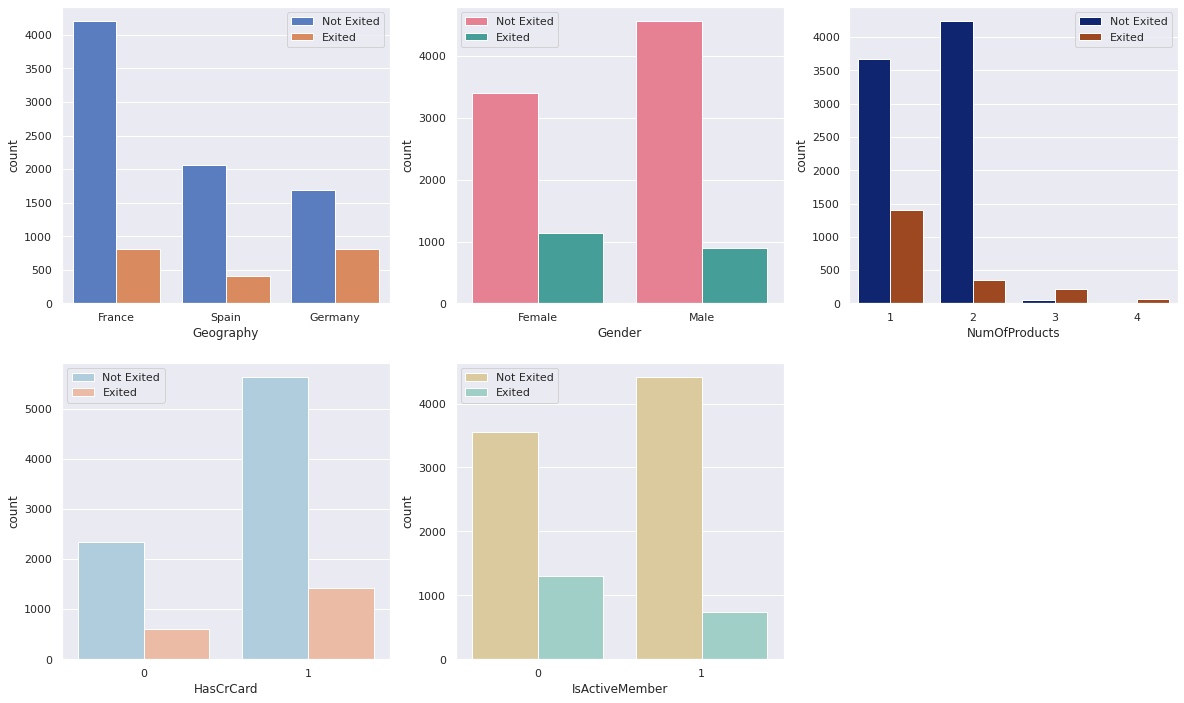

In [14]:
sns.set(color_codes=True)
plt.figure(figsize=(20,12))

A=[ 'Geography',
       'Gender', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']
B=["muted","husl","dark","RdBu_r","BrBG"]

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.countplot(x=A[i], hue='Exited', data=data, palette=B[i])
    #plt.title('Exited Frequency for Gender')
    #plt.xlabel('Gender')
    plt.xticks(rotation=0)
    plt.legend(["Not Exited", "Exited"])
    #plt.ylabel('Frequency')
    #plt.show()

plt.show()

##### **Drop the columns which are unique for all users like IDs**

In [15]:
data1 = data.drop(["RowNumber","CustomerId","Surname"], axis = 1)

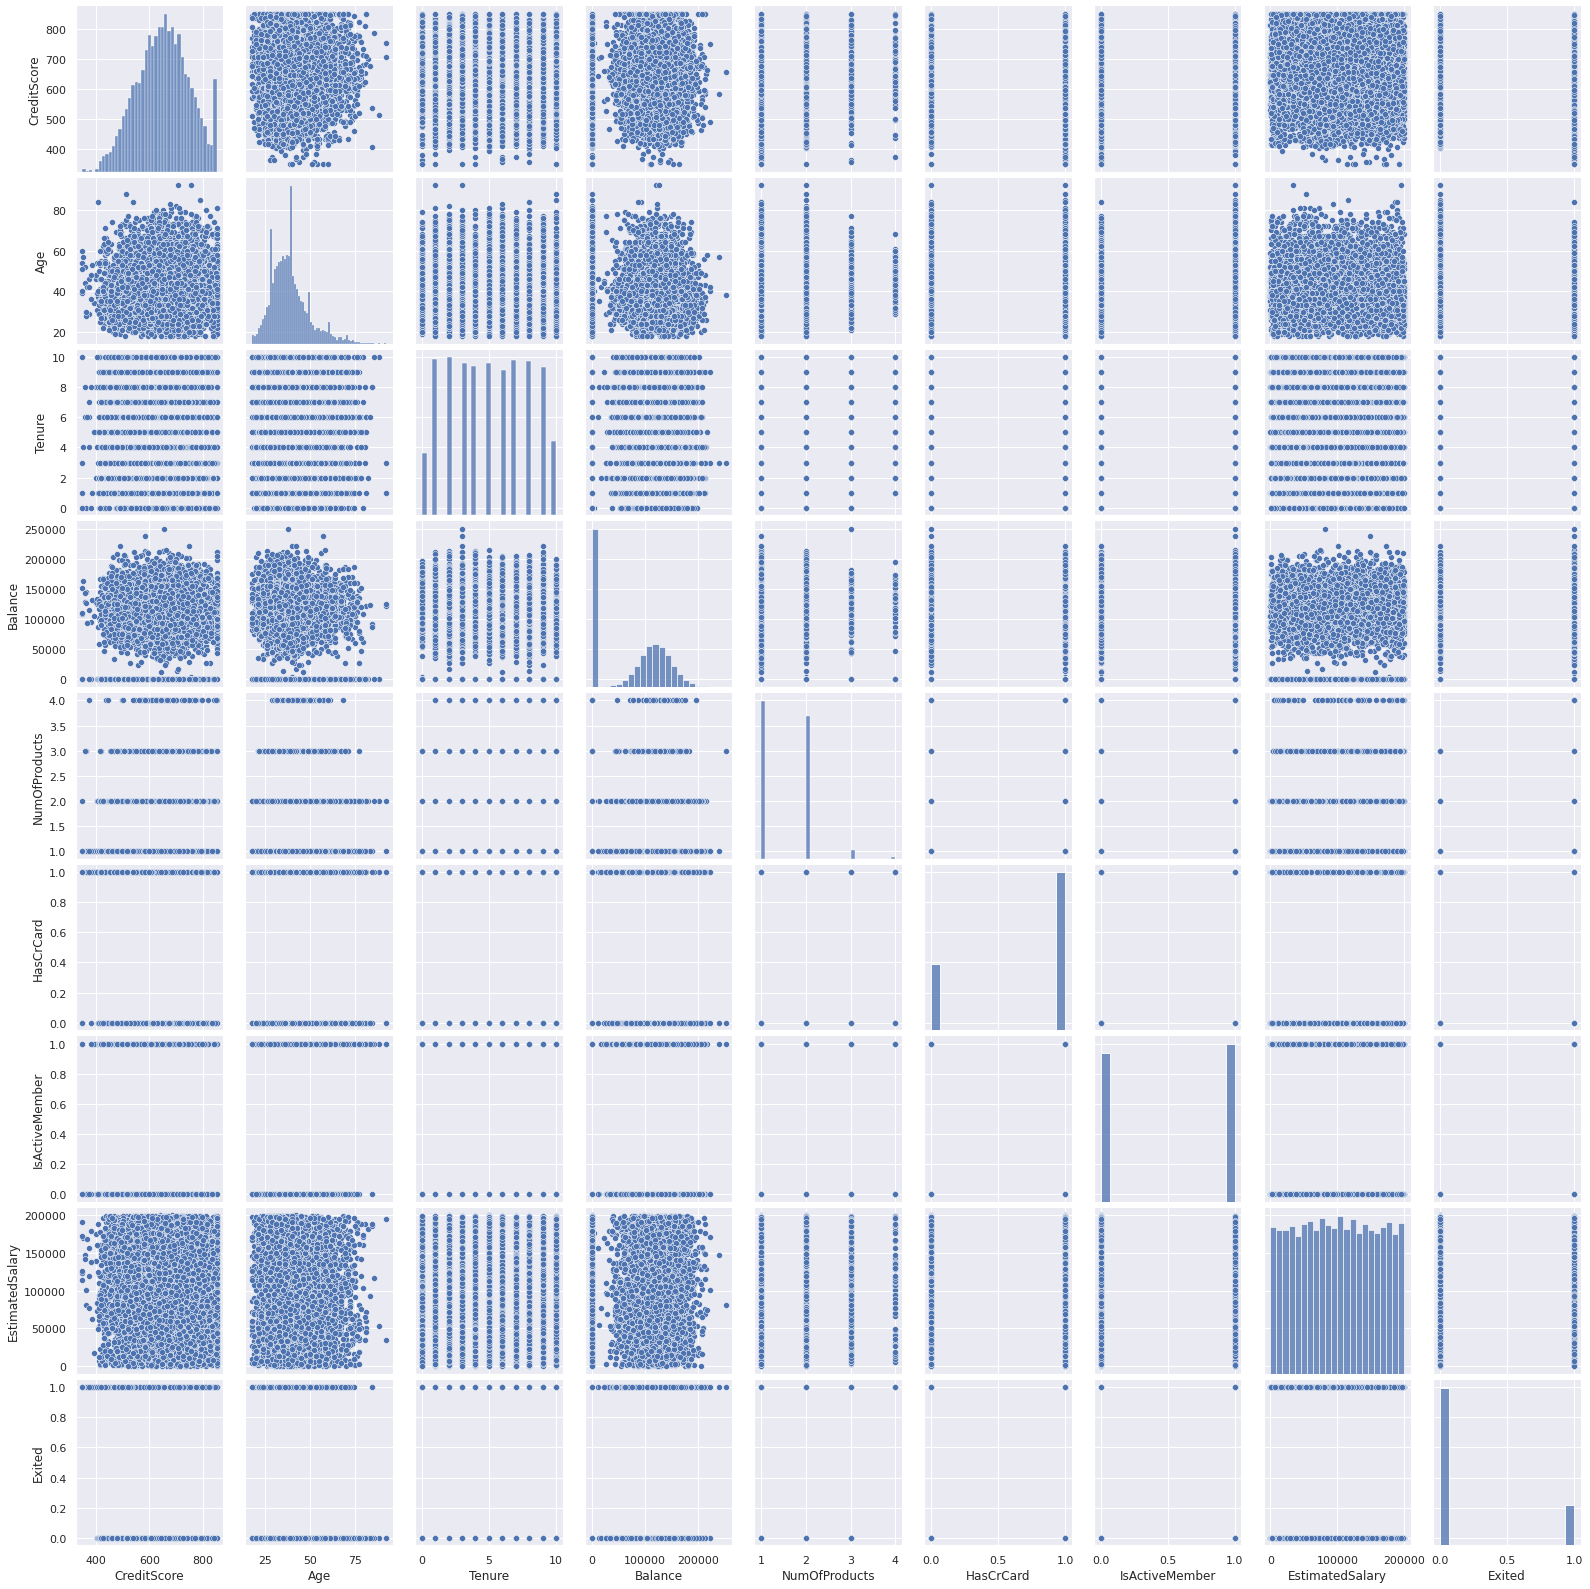

In [16]:
sns.pairplot(data1)

In [17]:
data1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
data1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Splitting data to into dependent and independent variables
##### Distinguish the feature and target set
X = Independent Variable
Y = Dependent Variable

In [19]:
X_data = data1.iloc[:, :-1]

In [20]:
X_data.shape

(10000, 10)

In [21]:
y_data = data1.iloc[:, -1]

In [22]:
#Convert categorical vriables to dummy variables
X_data = pd.get_dummies(X_data, drop_first=True)

##### **Divide the data set into trainingand test sets**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

 ### **Normalize the train and test data**

##### Imported  Standard scalar to sclaed the data 

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
X_train= scaler.fit_transform(X_train)

In [27]:
X_test =  scaler.transform(X_test)

In [28]:
print(X_train.shape) 
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


##### **Initialize & build the model. Identify the points of improvement and implement the same the same.**

### Creating a model

Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation


In [29]:
model = Sequential()

##Adding layers [layers and activations]
Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

In [30]:
n_inputs = X_train.shape[1]
model.add(Dense(64, input_shape = (n_inputs,), activation = 'relu'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

### Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

In [31]:
sgd = optimizers.Adam(lr = 0.001)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


### Training [Forward pass and Backpropagation]

Training the model

In [33]:
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['acc'])

In [34]:
model.fit(X_train, y_train.values, batch_size = 700, epochs = 175, verbose = 1)

Train on 8000 samples
Epoch 1/175
8000/8000 [==============================] - 1s 85us/sample - loss: 0.6343 - acc: 0.6507
Epoch 2/175
8000/8000 [==============================] - 0s 5us/sample - loss: 0.5037 - acc: 0.7964
Epoch 3/175
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4758 - acc: 0.7971
Epoch 4/175
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4534 - acc: 0.8040
Epoch 5/175
8000/8000 [==============================] - 0s 5us/sample - loss: 0.4406 - acc: 0.8098
Epoch 6/175
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4316 - acc: 0.8117
Epoch 7/175
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4246 - acc: 0.8136
Epoch 8/175
8000/8000 [==============================] - 0s 6us/sample - loss: 0.4187 - acc: 0.8167
Epoch 9/175
8000/8000 [==============================] - 0s 5us/sample - loss: 0.4132 - acc: 0.8205
Epoch 10/175
8000/8000 [==============================] - 0s 7us/sample - los

### Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

In [35]:
results = model.evaluate(X_test, y_test.values)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [36]:
print(model.metrics_names)
print(results) 

['loss', 'acc']
[0.3446141467094421, 0.8555]


 #### **Predict the results using 0.5 as a threshold**

In [37]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
Y_pred_cls = Y_pred_cls > 0.5
Y_pred_cls


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

##### **Print the Accuracy score and confusion matrix**

In [38]:
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

array([[1512,   77],
       [ 212,  199]])

Received Accuracy of 85.5% 

Thank you